# Código PR

## Declaración librerías a usar

In [20]:
import numpy as np
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import cv2

In [21]:
def print_numbers_pred(X, y, y_pred, num_images=9, figsize=(12, 8)): 
    factor = int(np.sqrt(num_images))
    fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=figsize)
    indexes = np.random.randint(0, len(y), num_images)
    idx_offset = 0
    for i in range(factor):
        index = indexes[idx_offset+i*(factor)]
        for j in range(factor):
            ax[i,j].imshow(X[index+j].reshape(28,28), cmap='gray')
            ax[i,j].set_title(f'{y[index+j]} predicted as {y_pred[index+j]}')
            ax[i,j].set_axis_off()

In [22]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [23]:
X, y = X.to_numpy(), y.to_numpy()

In [24]:
target_names = np.unique(y)
print('Number of samples: {0}, type:{1}'.format(X.shape[0],X.dtype))
print('Number of features: {0}'.format(X.shape[1]))
print('Minimum:{0},Maximum:{1}'.format(np.min(X),np.max(X)))
print('Number of classes: {0}, type:{1}'.format(len(target_names),y.dtype))
print('Labels: {0}'.format(target_names))

Number of samples: 70000, type:int64
Number of features: 784
Minimum:0,Maximum:255
Number of classes: 10, type:object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


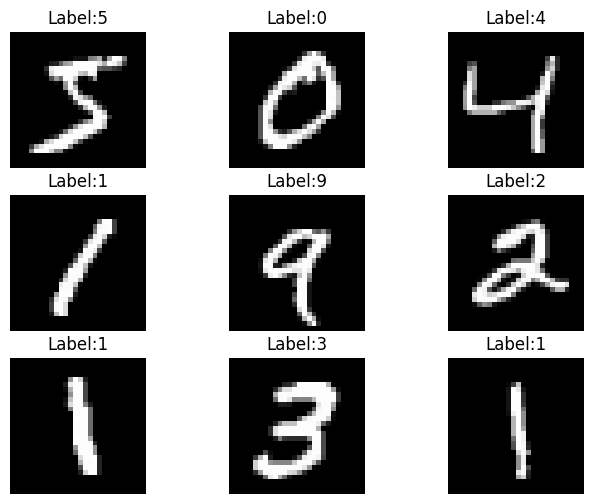

In [25]:
num_images = 9 # Choose a square number
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8,6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"
for i in range(factor):
  index = idx_offset+i*(factor)
  for j in range(factor):
    ax[i,j].imshow(X[index+j].reshape(28,28), cmap='gray')
    ax[i,j].set_title('Label:{0}'.format(str(y[index+j])))
    ax[i,j].set_axis_off()

In [26]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [27]:
model = MLPClassifier()

In [28]:
# model.fit(X_train, y_train)
model.fit(X, y)

MLPClassifier()

In [29]:
y_test_pred = model.predict(X_test)

In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      1.00      1.00       958
           7       1.00      1.00      1.00      1028
           8       0.97      1.00      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



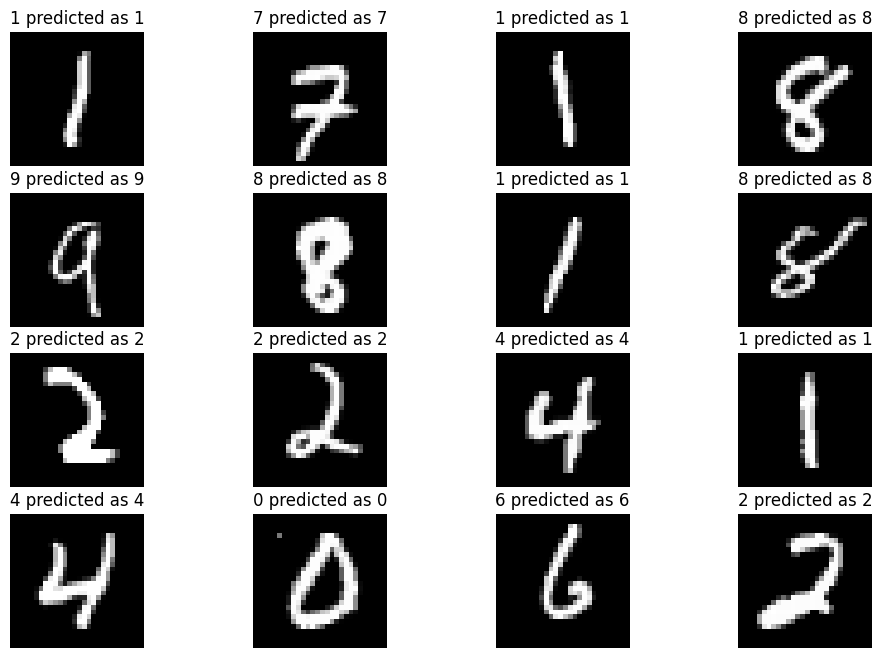

In [31]:
print_numbers_pred(X_test, y_test, y_test_pred, 18)

In [32]:
errors = (y_test != y_test_pred)
X_test_errors = X_test[errors]
y_test_errors = y_test[errors]
y_test_pred_errors = y_test_pred[errors]

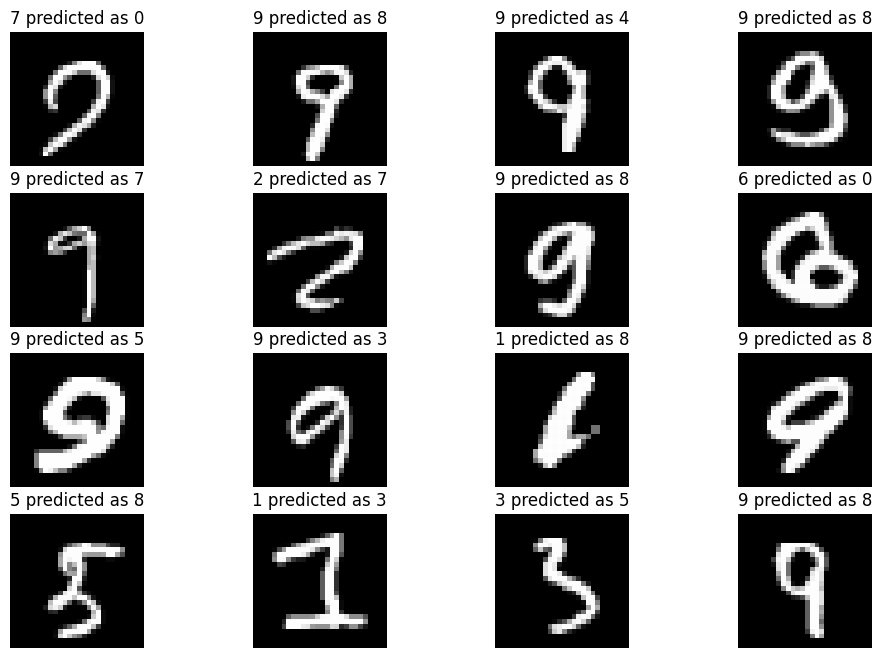

In [34]:
print_numbers_pred(X_test_errors, y_test_errors, y_test_pred_errors, 24)

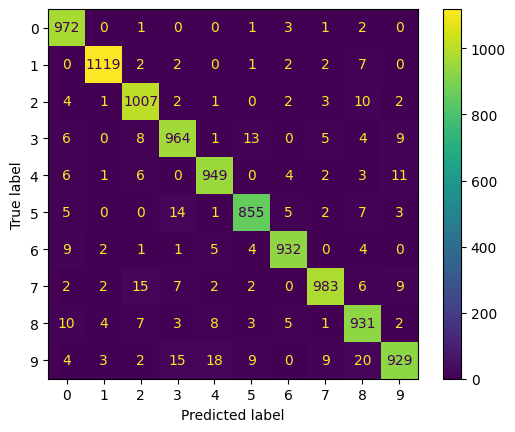

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, values_format='.5g')

In [ ]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

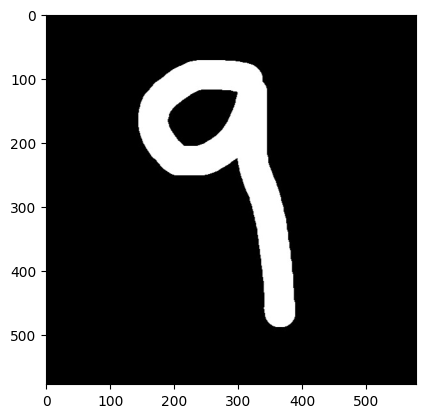

In [ ]:
number = 255 - cv2.imread('9.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(number, cmap='gray')
plt.show()

(28, 28)


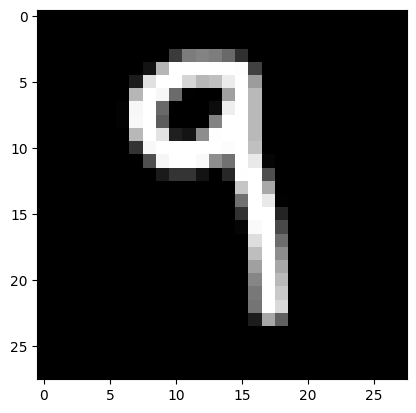

In [ ]:
X_number = cv2.resize(number, (28, 28), interpolation = cv2.INTER_AREA)
# X_number = np.array(X_number > 10, dtype=np.int64) * 255
print(X_number.shape)
plt.imshow(X_number, cmap='gray')
plt.show()
X_number_pred = X_number.reshape(784)

In [ ]:
X_number_pred = X_number_pred.reshape(1, -1)
X_number_pred.shape

(1, 784)

In [ ]:
y_number = np.array([9])

In [ ]:
model.predict(X_number_pred)

array(['3'], dtype='<U1')

In [ ]:
(model.predict_proba(X_number_pred))

array([[6.67591586e-12, 2.03049484e-08, 1.52648255e-06, 9.69169628e-01,
        1.18180310e-13, 3.17171552e-04, 9.06414258e-12, 2.61277570e-07,
        3.05112244e-02, 1.68102234e-07]])

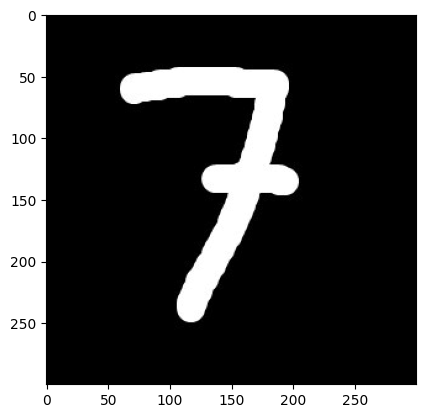

In [ ]:
number = 255 - cv2.imread('7.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(number, cmap='gray')
plt.show()

(28, 28)


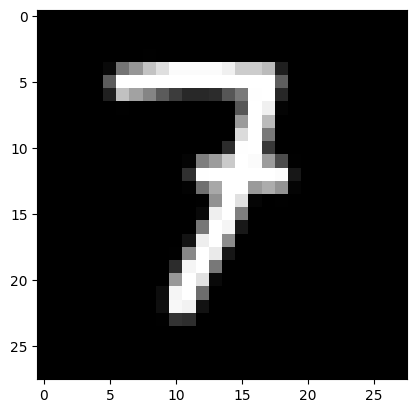

In [ ]:

X_number = cv2.resize(number, (28, 28), interpolation = cv2.INTER_AREA)
# X_number = np.array(X_number > 10, dtype=np.int64) * 255
print(X_number.shape)
plt.imshow(X_number, cmap='gray')
plt.show()
X_number_pred = X_number.reshape(784)

In [ ]:
X_number_pred = X_number_pred.reshape(1, -1)
X_number_pred.shape
y_number = np.array([6])
model.predict(X_number_pred)

array(['2'], dtype='<U1')

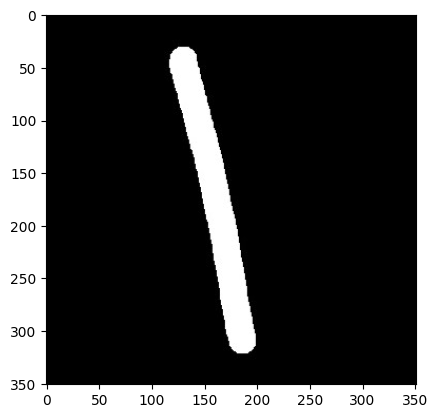

In [ ]:
number = 255 - cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(number, cmap='gray')
plt.show()

(28, 28)


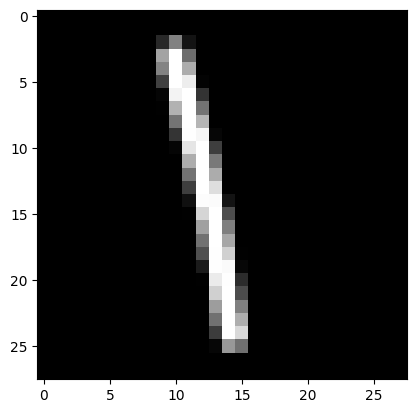

In [ ]:
X_number = cv2.resize(number, (28, 28), interpolation = cv2.INTER_AREA)
# X_number = np.array(X_number > 10, dtype=np.int64) * 255
print(X_number.shape)
plt.imshow(X_number, cmap='gray')
plt.show()
X_number_pred = X_number.reshape(784)

In [ ]:
X_number_pred = X_number_pred.reshape(1, -1)
X_number_pred.shape
y_number = np.array([4])
model.predict(X_number_pred)

array(['2'], dtype='<U1')

In [ ]:
print(model.predict_proba(X_number_pred))


[[7.44411131e-40 4.03011001e-05 9.99959471e-01 6.73059352e-12
  3.34548891e-50 2.15365836e-10 1.43897043e-12 1.65182695e-36
  2.27619694e-07 1.58624590e-34]]
